# 宿題: K-Means法を実装しよう!

Copyright 2017 DataMix., Ltd. 

<h2>K-Means法</h2>

KMeans法とは、教師なし機械学習手法の1つであり、非階層型クラスタリングの一種です。そのアルゴリズムはとてもシンプルです。

<br>
1)はじめにk個をデータからランダムに選びシードとします。

2)各データと各シードを比較し、最も近いシードと同じクラスターに分類します

3)k個のクラスターそれぞれで重心を求め、それを新たなシードとして更新します

4)重心の位置が変化しなくなるまで 2) ~ 3) を繰り返す 

<br>
与えられたクラスター数$K$について、各クラスターに含まれる全てのデータ集合を$X_i (i=1, 2, \cdots , K)$と表現し、$X_i$に含まれる各データをxとします。また、そのクラスターの重心$\mu_i(i=1, 2, \cdots , K)$とします。
KMeans法の目的関数は、それぞれのクラスターに含まれるデータ$x$と重心$\mu_i$の距離の2乗の合計を、全てのクラスターに渡って足しあげたものいうことになります。そして、ゴールはこの目的関数を最小化するように、各データ$x$がどのクラスター$X_i$に属するかを調整することになります。そして、それを実現する方法が、上のアルゴリズムとなります。

\begin{equation*}
J(X_i) = \sum_{i=1}^{K} \sum_{x \in X_i} ||x - \mu_i||^2
\end{equation*}

# 宿題：K-Means法を実際に作ってみましょう！
上記で生成したdataを使ってK-Means法を実際に作ってみましょう。

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

ダミーデータの作成

In [2]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance,covariance],
           [covariance,variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

In [3]:
cluster1 = generate_2dim_normal(mean = [0, 8], variance=1, covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean = [-1, 0], variance=1, covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean = [10, 10], variance=1, covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean = [5, 5.5], variance=0.8, covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

プロシージャの定義

In [4]:
def get_cluster_id_by_euclidian_distance(data, center): 
    #まずデータ点 x シードの数の全て0の行列を用意しておきます
    result = np.zeros([len(data), len(center)])
    
    #シードごとに、各データ点との距離を計算し、resultに格納します
    for i in range(len(center)):
        square_total = ((data - center[i])**2).sum(axis=1)
        euclidian_distance = np.sqrt(square_total)
        result[:, i] = euclidian_distance
    
    #一番近いシート番号を取得します。
    cluster_labels = result.argmin(axis=1)
    return cluster_labels

In [5]:
def update_center(prev_center, cluster_labels):
    new_center = np.zeros(prev_center.shape)
    for i in range(cluster_num):
        new_center[i, :] = data[cluster_labels==i].mean(axis=0)
    return new_center

In [6]:
def cluster_visualize(data, cluster_labels):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
    cluster_ids = list(set(cluster_labels))
    for k in range(len(cluster_ids)):
        cluster_id = cluster_ids[k]
        label_ = "clutser = %d"%cluster_id
        data_by_cluster = data[cluster_labels == cluster_id]
        ax.scatter(data_by_cluster[:,0], data_by_cluster[:,1], c=colorlist[k], label = label_)

    ax.set_title(u"Clustering")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend(loc='lower right')

In [7]:
def yourKmeans(data, cluster_num, max_iter = 10):
    #最初のシードを設定
    seed_idx = np.random.randint(len(data), size=cluster_num)
    init_center = data[seed_idx]
    print("最初のシード")
    print(init_center)

    before_center = init_center
    counter = 0
    diff = 0
    conclusion = "分類は未完了"
        
    while counter < max_iter:
        #シードの最寄りのクラスター番号(clutser_label）を取得
        cluster_labels = get_cluster_id_by_euclidian_distance(data, before_center)
        
        #クラスターごとに重心を設定
        new_center = update_center(prev_center=before_center, cluster_labels=cluster_labels)
    
        #前のシードと新しいシードの差異
        diff = np.sqrt(np.sum((new_center - before_center)**2))
        if diff == 0:
            conclusion = "綺麗に分類"
            break
        
        #新しく取った重心をシードに設定
        before_center = new_center
        
        #カウントアップ
        counter += 1

    print(counter-1,"回目のシード")
    print(new_center)

    #最初のシードと最後のシードの差異
    diff = np.sqrt(np.sum((new_center - init_center)**2))
    print("シードが動いた総距離")
    print(diff)
    print(conclusion)

    return cluster_labels

実行用

最初のシード
[[ 10.64874178  10.42029385]
 [  0.78809519   7.87210149]
 [ 10.67443067  10.06251757]
 [  0.21541336   7.98856028]]
5 回目のシード
[[ 10.04252355  10.01374019]
 [ -0.98992682  -0.05238653]
 [  5.03026733   5.53911027]
 [  0.07498557   8.04170852]]
シードが動いた総距離
10.9010089966
綺麗に分類


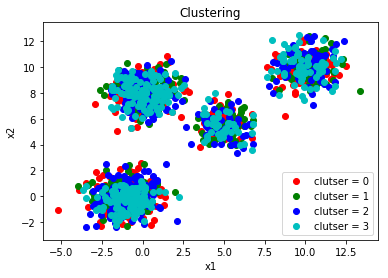

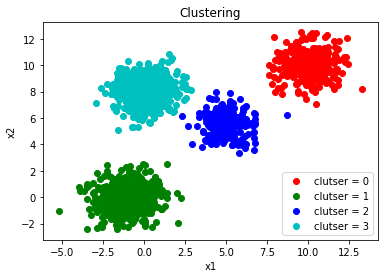

In [8]:
#ダミーのデータを設定
cluster1 = generate_2dim_normal(mean = [0, 8], variance=1, covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean = [-1, 0], variance=1, covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean = [10, 10], variance=1, covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean = [5, 5.5], variance=0.8, covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

#分類するクラスター数の設定
cluster_num = 4

#初期状態のグラフ
cluster_labels = np.random.randint(0, cluster_num, size = len(data))
cluster_visualize(data, cluster_labels)

#KMeansの実行
updated_cluster_labels = yourKmeans(data, cluster_num, max_iter=10)
cluster_visualize(data, updated_cluster_labels)